<a href="https://colab.research.google.com/github/Prash7621/Data-Science/blob/main/D46EarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

dt=pd.read_csv("/content/Churn_Modelling.csv")
dt.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dt.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
input_dt=dt.iloc[:,3:-1]
output_dt=dt["Exited"]
input_dt.drop(["Geography","Gender"],axis=1,inplace=True)

In [ ]:
ss=StandardScaler()
input_dt= pd.DataFrame(ss.fit_transform(input_dt), columns=input_dt.columns)

In [ ]:
input_dt.shape

(10000, 8)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(input_dt,output_dt,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(8000, 8)

In [ ]:
import tensorflow

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [ ]:
ann=Sequential()

In [ ]:
ann.add(Dense(6,input_dim=8,activation="relu"))
ann.add(Dense(4,activation="relu"))
ann.add(Dense(2,activation="relu"))
ann.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
ann.fit(x_train,y_train,batch_size=100,epochs=50, validation_data=(x_test, y_test), callbacks=EarlyStopping())

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7973 - loss: 0.6316 - val_accuracy: 0.8035 - val_loss: 0.5045
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7950 - loss: 0.5120 - val_accuracy: 0.8035 - val_loss: 0.4966
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7980 - loss: 0.5039 - val_accuracy: 0.8035 - val_loss: 0.4958
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7992 - loss: 0.5017 - val_accuracy: 0.8035 - val_loss: 0.4970


In [ ]:
train_acc=ann.history.history["accuracy"]
test_acc=ann.history.history["val_accuracy"]

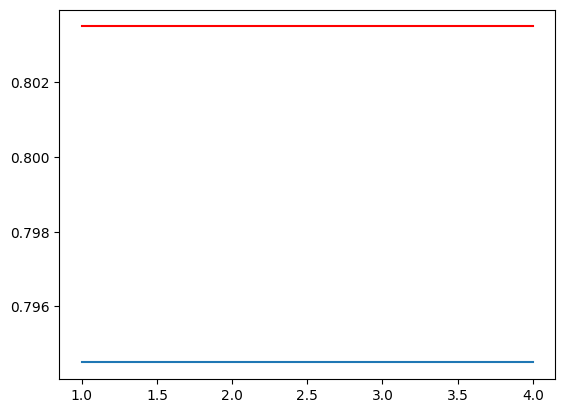

In [ ]:
plt.plot([i for i in range(1,5)], train_acc)
plt.plot([i for i in range(1,5)],test_acc,c="red")

In [ ]:
prd=ann.predict(x_test)
prd_data=[]
for i in prd:
  if i>0.5:
    prd_data.append(1)
  else:
    prd_data.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
prd1=ann.predict(x_train)
prd_data1=[]
for i in prd1:
  if i>0.5:
    prd_data1.append(1)
  else:
    prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,prd_data)*100

80.35

In [ ]:
accuracy_score(y_train,prd_data1)*100

79.45